In [117]:
import tensorflow as tf 
import numpy as np 
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [118]:
# Instead of using random observations, try to classify some data with structure, like MNIST.
from tensorflow.keras.datasets import mnist 
from matplotlib import pyplot as plt 

In [119]:
(trainX, trainy), (testX, testy) = mnist.load_data()

In [120]:
X = trainX[0:1000]
y = trainy[0:1000]

y = tf.keras.utils.to_categorical(y)

print("X size:", X.shape)
print("Y size:", y.shape)

X size: (1000, 28, 28)
Y size: (1000, 10)


In [121]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        loss = logs["loss"]
        if loss <= self.threshold:
            self.model.stop_training = True

In [122]:
unit_range = np.arange(20000, 30005, 1000)

initial_weights = []
final_weights = []
diff_weights = []

In [123]:
for units in unit_range:
    print("units = ", units)
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
        tf.keras.layers.Dense(units = units, activation = 'relu'),
        tf.keras.layers.Dense(units = 10, activation = 'softmax')
    ])
    initial_weights.append(model.layers[2].get_weights()[0])

    my_callback = MyThresholdCallback(threshold=5)

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X, y, epochs = 400, batch_size = 1, callbacks = [my_callback], verbose = 1)

    final_weights.append(model.layers[2].get_weights()[0])

units =  20000
Epoch 1/400
   1/1000 [..............................] - ETA: 5:06 - loss: 43.8378 - accuracy: 0.0000e+00

2023-04-24 18:37:06.781049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 25s 25ms/step - loss: 102.3490 - accuracy: 0.6150
Epoch 2/400
1000/1000 [==============================] - 23s 23ms/step - loss: 43.5527 - accuracy: 0.8050
Epoch 3/400
1000/1000 [==============================] - 23s 23ms/step - loss: 39.9921 - accuracy: 0.8440
Epoch 4/400
1000/1000 [==============================] - 23s 23ms/step - loss: 24.8631 - accuracy: 0.9000
Epoch 5/400
1000/1000 [==============================] - 24s 24ms/step - loss: 19.2939 - accuracy: 0.9270
Epoch 6/400
1000/1000 [==============================] - 24s 24ms/step - loss: 21.3097 - accuracy: 0.9310
Epoch 7/400
1000/1000 [==============================] - 26s 26ms/step - loss: 13.1563 - accuracy: 0.9510
Epoch 8/400
1000/1000 [==============================] - 24s 24ms/step - loss: 13.1851 - accuracy: 0.9610
Epoch 9/400
1000/1000 [==============================] - 26s 26ms/step - loss: 15.5894 - accuracy: 0.9540
Epoch 10/400
1000/1000 [==============================] -

2023-04-24 18:41:56.420310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 25s 25ms/step - loss: 106.7808 - accuracy: 0.6070
Epoch 2/400
1000/1000 [==============================] - 25s 25ms/step - loss: 42.5962 - accuracy: 0.8010
Epoch 3/400
1000/1000 [==============================] - 27s 27ms/step - loss: 26.1907 - accuracy: 0.8680
Epoch 4/400
1000/1000 [==============================] - 25s 25ms/step - loss: 27.3478 - accuracy: 0.8890
Epoch 5/400
1000/1000 [==============================] - 25s 25ms/step - loss: 24.6026 - accuracy: 0.9130
Epoch 6/400
1000/1000 [==============================] - 25s 25ms/step - loss: 17.0165 - accuracy: 0.9270
Epoch 7/400
1000/1000 [==============================] - 26s 26ms/step - loss: 19.3701 - accuracy: 0.9370
Epoch 8/400
1000/1000 [==============================] - 25s 25ms/step - loss: 12.5190 - accuracy: 0.9620
Epoch 9/400
1000/1000 [==============================] - 27s 27ms/step - loss: 13.2733 - accuracy: 0.9540
Epoch 10/400
1000/1000 [==============================] -

2023-04-24 18:48:45.346792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 28s 28ms/step - loss: 107.4887 - accuracy: 0.6100
Epoch 2/400
1000/1000 [==============================] - 26s 26ms/step - loss: 49.9379 - accuracy: 0.7830
Epoch 3/400
1000/1000 [==============================] - 29s 29ms/step - loss: 38.2944 - accuracy: 0.8500
Epoch 4/400
1000/1000 [==============================] - 26s 26ms/step - loss: 21.4063 - accuracy: 0.9000
Epoch 5/400
1000/1000 [==============================] - 26s 26ms/step - loss: 29.4616 - accuracy: 0.9010
Epoch 6/400
1000/1000 [==============================] - 26s 26ms/step - loss: 15.6142 - accuracy: 0.9360
Epoch 7/400
1000/1000 [==============================] - 26s 26ms/step - loss: 20.6835 - accuracy: 0.9340
Epoch 8/400
1000/1000 [==============================] - 26s 26ms/step - loss: 8.5250 - accuracy: 0.9700
Epoch 9/400
1000/1000 [==============================] - 26s 26ms/step - loss: 12.7335 - accuracy: 0.9600
Epoch 10/400
1000/1000 [==============================] - 

2023-04-24 18:55:43.240611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 27s 27ms/step - loss: 106.1589 - accuracy: 0.6200
Epoch 2/400
1000/1000 [==============================] - 26s 26ms/step - loss: 47.2018 - accuracy: 0.7850
Epoch 3/400
1000/1000 [==============================] - 25s 25ms/step - loss: 41.7696 - accuracy: 0.8670
Epoch 4/400
1000/1000 [==============================] - 25s 25ms/step - loss: 25.3466 - accuracy: 0.9050
Epoch 5/400
1000/1000 [==============================] - 473s 473ms/step - loss: 21.4024 - accuracy: 0.9230
Epoch 6/400
1000/1000 [==============================] - 142s 143ms/step - loss: 20.3951 - accuracy: 0.9370
Epoch 7/400
1000/1000 [==============================] - 119s 120ms/step - loss: 15.8624 - accuracy: 0.9520
Epoch 8/400
1000/1000 [==============================] - 69s 69ms/step - loss: 14.5536 - accuracy: 0.9540
Epoch 9/400
1000/1000 [==============================] - 2949s 3s/step - loss: 25.0521 - accuracy: 0.9440
Epoch 10/400
1000/1000 [===========================

2023-04-24 20:37:33.673043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 27s 27ms/step - loss: 123.0396 - accuracy: 0.6280
Epoch 2/400
1000/1000 [==============================] - 27s 27ms/step - loss: 60.1175 - accuracy: 0.7850
Epoch 3/400
1000/1000 [==============================] - 27s 27ms/step - loss: 50.5651 - accuracy: 0.8350
Epoch 4/400
1000/1000 [==============================] - 27s 27ms/step - loss: 36.8920 - accuracy: 0.9090
Epoch 5/400
1000/1000 [==============================] - 26s 26ms/step - loss: 28.2328 - accuracy: 0.9220
Epoch 6/400
1000/1000 [==============================] - 27s 27ms/step - loss: 21.7298 - accuracy: 0.9440
Epoch 7/400
1000/1000 [==============================] - 26s 26ms/step - loss: 17.9406 - accuracy: 0.9560
Epoch 8/400
1000/1000 [==============================] - 27s 27ms/step - loss: 21.8426 - accuracy: 0.9540
Epoch 9/400
1000/1000 [==============================] - 27s 27ms/step - loss: 35.2021 - accuracy: 0.9430
Epoch 10/400
1000/1000 [==============================] -

2023-04-24 20:44:54.996283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 29s 29ms/step - loss: 106.3075 - accuracy: 0.6210
Epoch 2/400
1000/1000 [==============================] - 29s 29ms/step - loss: 41.0225 - accuracy: 0.7920
Epoch 3/400
1000/1000 [==============================] - 28s 28ms/step - loss: 41.2243 - accuracy: 0.8480
Epoch 4/400
1000/1000 [==============================] - 29s 29ms/step - loss: 24.4547 - accuracy: 0.9040
Epoch 5/400
1000/1000 [==============================] - 29s 29ms/step - loss: 20.8387 - accuracy: 0.9250
Epoch 6/400
1000/1000 [==============================] - 27s 27ms/step - loss: 13.2915 - accuracy: 0.9410
Epoch 7/400
1000/1000 [==============================] - 27s 27ms/step - loss: 20.4560 - accuracy: 0.9400
Epoch 8/400
1000/1000 [==============================] - 27s 27ms/step - loss: 9.3516 - accuracy: 0.9660
Epoch 9/400
1000/1000 [==============================] - 27s 27ms/step - loss: 16.0479 - accuracy: 0.9510
Epoch 10/400
1000/1000 [==============================] - 

2023-04-24 20:53:30.748124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 27s 27ms/step - loss: 109.7281 - accuracy: 0.6420
Epoch 2/400
1000/1000 [==============================] - 27s 27ms/step - loss: 55.6544 - accuracy: 0.7720
Epoch 3/400
1000/1000 [==============================] - 27s 27ms/step - loss: 43.8353 - accuracy: 0.8450
Epoch 4/400
1000/1000 [==============================] - 27s 27ms/step - loss: 21.4764 - accuracy: 0.9070
Epoch 5/400
1000/1000 [==============================] - 28s 28ms/step - loss: 21.0688 - accuracy: 0.9190
Epoch 6/400
1000/1000 [==============================] - 30s 30ms/step - loss: 16.9437 - accuracy: 0.9450
Epoch 7/400
1000/1000 [==============================] - 28s 28ms/step - loss: 13.7804 - accuracy: 0.9460
Epoch 8/400
1000/1000 [==============================] - 28s 28ms/step - loss: 10.5181 - accuracy: 0.9620
Epoch 9/400
1000/1000 [==============================] - 28s 28ms/step - loss: 20.9208 - accuracy: 0.9500
Epoch 10/400
1000/1000 [==============================] -

2023-04-24 20:59:57.143824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 28s 28ms/step - loss: 117.6545 - accuracy: 0.6150
Epoch 2/400
1000/1000 [==============================] - 28s 28ms/step - loss: 54.2296 - accuracy: 0.7880
Epoch 3/400
1000/1000 [==============================] - 28s 28ms/step - loss: 48.3310 - accuracy: 0.8550
Epoch 4/400
1000/1000 [==============================] - 28s 28ms/step - loss: 30.8508 - accuracy: 0.9030
Epoch 5/400
1000/1000 [==============================] - 28s 28ms/step - loss: 25.3237 - accuracy: 0.9210
Epoch 6/400
1000/1000 [==============================] - 28s 28ms/step - loss: 16.6574 - accuracy: 0.9440
Epoch 7/400
1000/1000 [==============================] - 28s 28ms/step - loss: 6.2790 - accuracy: 0.9720
Epoch 8/400
1000/1000 [==============================] - 28s 28ms/step - loss: 17.8875 - accuracy: 0.9440
Epoch 9/400
1000/1000 [==============================] - 28s 28ms/step - loss: 37.2273 - accuracy: 0.9230
Epoch 10/400
1000/1000 [==============================] - 

2023-04-24 21:05:57.500049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 30s 29ms/step - loss: 144.2588 - accuracy: 0.6170
Epoch 2/400
1000/1000 [==============================] - 31s 31ms/step - loss: 70.6649 - accuracy: 0.8000
Epoch 3/400
1000/1000 [==============================] - 32s 32ms/step - loss: 46.9155 - accuracy: 0.8750
Epoch 4/400
1000/1000 [==============================] - 28s 28ms/step - loss: 50.5361 - accuracy: 0.8790
Epoch 5/400
1000/1000 [==============================] - 28s 28ms/step - loss: 43.2287 - accuracy: 0.9090
Epoch 6/400
1000/1000 [==============================] - 28s 28ms/step - loss: 22.0441 - accuracy: 0.9400
Epoch 7/400
1000/1000 [==============================] - 31s 31ms/step - loss: 34.2569 - accuracy: 0.9360
Epoch 8/400
1000/1000 [==============================] - 28s 28ms/step - loss: 22.7795 - accuracy: 0.9500
Epoch 9/400
1000/1000 [==============================] - 28s 28ms/step - loss: 25.1336 - accuracy: 0.9580
Epoch 10/400
1000/1000 [==============================] -

2023-04-24 21:11:18.370368: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 29s 29ms/step - loss: 145.3347 - accuracy: 0.6110
Epoch 2/400
1000/1000 [==============================] - 29s 29ms/step - loss: 61.6505 - accuracy: 0.7940
Epoch 3/400
1000/1000 [==============================] - 29s 29ms/step - loss: 43.3747 - accuracy: 0.8620
Epoch 4/400
1000/1000 [==============================] - 29s 29ms/step - loss: 45.6920 - accuracy: 0.8840
Epoch 5/400
1000/1000 [==============================] - 29s 29ms/step - loss: 30.5784 - accuracy: 0.9210
Epoch 6/400
1000/1000 [==============================] - 29s 29ms/step - loss: 26.6949 - accuracy: 0.9320
Epoch 7/400
1000/1000 [==============================] - 29s 29ms/step - loss: 17.8972 - accuracy: 0.9580
Epoch 8/400
1000/1000 [==============================] - 29s 29ms/step - loss: 23.4536 - accuracy: 0.9550
Epoch 9/400
1000/1000 [==============================] - 29s 29ms/step - loss: 19.8267 - accuracy: 0.9600
Epoch 10/400
1000/1000 [==============================] -

2023-04-24 21:20:34.189094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1000/1000 [==============================] - 30s 30ms/step - loss: 129.7718 - accuracy: 0.6180
Epoch 2/400
1000/1000 [==============================] - 30s 30ms/step - loss: 54.6701 - accuracy: 0.8010
Epoch 3/400
1000/1000 [==============================] - 30s 30ms/step - loss: 59.6733 - accuracy: 0.8420
Epoch 4/400
1000/1000 [==============================] - 30s 30ms/step - loss: 32.6065 - accuracy: 0.9040
Epoch 5/400
1000/1000 [==============================] - 30s 30ms/step - loss: 36.3805 - accuracy: 0.9210
Epoch 6/400
1000/1000 [==============================] - 30s 30ms/step - loss: 30.3611 - accuracy: 0.9330
Epoch 7/400
1000/1000 [==============================] - 30s 30ms/step - loss: 22.0547 - accuracy: 0.9540
Epoch 8/400
1000/1000 [==============================] - 30s 30ms/step - loss: 19.6583 - accuracy: 0.9530
Epoch 9/400
1000/1000 [==============================] - 30s 30ms/step - loss: 14.2778 - accuracy: 0.9680
Epoch 10/400
1000/1000 [==============================] -

In [128]:
print(model.layers[1].get_weights()[0])


[[-0.00525508  0.00911203  0.00516401 ...  0.00927274  0.00256628
  -0.01254119]
 [ 0.00136833 -0.00702507 -0.00273009 ...  0.011072    0.00361784
  -0.00344631]
 [ 0.00021233  0.00639803 -0.01029387 ...  0.0031127   0.00051313
  -0.00819883]
 ...
 [ 0.01219133  0.00978124  0.00164073 ... -0.00130004  0.00205337
   0.00346785]
 [ 0.00342735  0.00712888 -0.00018844 ...  0.01257457 -0.01285012
  -0.01021994]
 [-0.00298039  0.00500697 -0.003348   ... -0.00716423  0.00861219
  -0.00770199]]


In [124]:
for i in range(len(initial_weights)):
    diff_weights.append(final_weights[i] - initial_weights[i])

diff_avg = []
for i in range(len(unit_range)):
    diff_weights_flat = np.ndarray.flatten(diff_weights[i])
    diff_weights_flat = np.abs(diff_weights_flat)
    diff_avg.append(np.average(diff_weights_flat))

In [125]:
print(np.shape(diff_avg))

(11,)


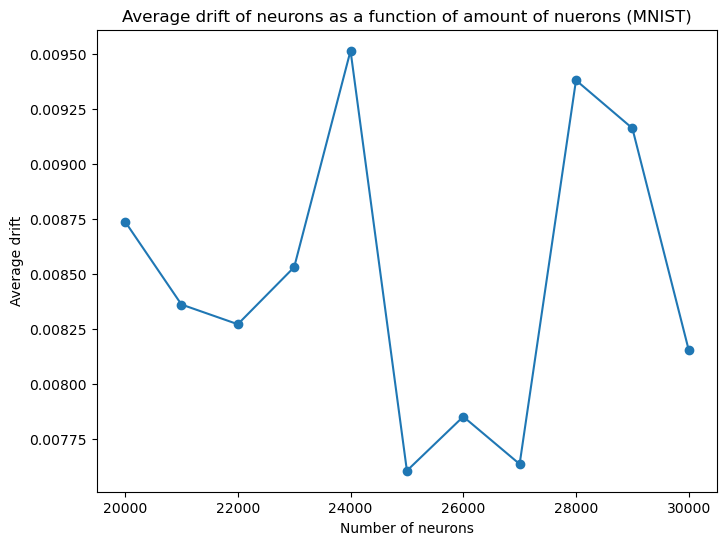

In [126]:
# set the size of the figure
fig, ax = plt.subplots(figsize = (8, 6))

# create the plot
ax.plot(unit_range, diff_avg, linestyle = '-', marker = 'o')

# set the title and axis labels
ax.set_title('Average drift of neurons as a function of amount of nuerons (MNIST)')
ax.set_xlabel('Number of neurons')
ax.set_ylabel('Average drift')


# display the plot
plt.show()